# Project: Retail Data Analytics
- Project proposal: Our goal is to provide recommended actions for stores to improve the department-wide sale. We will measure the influence of features such as markdowns and holiday on the sales and model the effects of markdowns on holiday weeks.
- Data source: https://www.kaggle.com/manjeetsingh/retaildataset
- Tableau dashboard (check part 6 for dashboard graphs):
https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team2BProject/FinalDashboard_1?:origin=card_share_link&:embed=n
- Project member: Chenli Qiu, Maro Derhovanessians, Shiyu Ye, Ying Li, Zhiyuan Sun

## 1. Exploring the Dataset
Historical department-wise sales data for 45 stores located in different regions are provided in the dataset. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

### 1.1 Stores Table

Contains data related to store type and store size.

In [10]:
%%bigquery --project ba775-team-2b stores
SELECT * FROM `ba775-team-2b.Retail_Data_Analytics.stores_data_set`

In [ ]:
stores[:5]

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,4,A,205863
3,6,A,202505
4,8,A,155078


### 1.2 Features Table

Contains additional data related to the store, department, and regional activity for the given dates.

- Store - the store number
<br>
- Date - the week
<br>
- Temperature - average temperature in the region
<br>
- Fuel_Price - cost of fuel in the region
<br>
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
<br>
- CPI - the consumer price index
<br>
- Unemployment - the unemployment rate
<br>
- IsHoliday - whether the week is a special holiday week

In [ ]:
%%bigquery
SELECT * FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set`

In [ ]:
features[:5]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.9980849,7.866,False
1,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.2205088,7.866,False
2,1,2011-12-02,48.91,3.172,5629.51,68,1398.11,2084.64,20475.32,218.7147333,7.866,False
3,1,2011-12-09,43.93,3.158,4640.65,19,105.02,3639.42,14461.82,218.9618456,7.866,False
4,1,2011-12-16,51.63,3.159,5011.32,67,347.37,225.79,4011.37,219.1794533,7.866,False


### 1.3 Sales Table

Historical sales data covers from 2010-02-05 to 2012-11-01.
<br>
- Store - the store number
<br>
- Dept - the department number
<br>
- Date - the week
<br>
- Weekly_Sales -  sales for the given department in the given store
<br>
- IsHoliday - whether the week is a special holiday week

In [11]:
%%bigquery sales
SELECT * FROM `ba775-team-2b.Retail_Data_Analytics.sales_data_set`

In [ ]:
sales[:5]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-19,41595.55,False
2,1,1,2010-02-26,19403.54,False
3,1,1,2010-03-05,21827.90,False
4,1,1,2010-03-12,21043.39,False


## 2.Exploring Questions

The goal for this project is to provide recommended actions for stores to improve the department-wide sale. In order to achieve this, We need to measure how different features influence stores' department-wide sales. There are ----five---- questions below and each of them gives insight about sales from different dimensions. 

### 2.1 Question:
What is the effect of CPI and Unemployment on department sales?
- Consumer Price Index (CPI) measures the average change in prices over time that consumers pay for a basket of goods and services. It can be used to assess price changes associated with the cost of living. Since the economic climate has a huge impact on customer's desire and ability to consume, in this problem, the effect of CPI and unemployment rate on the stores' department-wise sales are measured. The sales data is grouped by the department in order to better achieve the goal.
- Conclusion: Both 'Quarterly Sales VS. CPI' and 'Quarterly Sales VS. Unemployment' are in same shape for each department. Though one CPI value might correspond to multiple sales data, it is clearly shown in Figure 1 that the average quarterly sales with lower CPI is much higher. When considering the effect of unemplyment rate, the graph suggests that high quarterly sales is concentrated within unemployment range of 5 to 10. Overall, both CPI and unemployment rate can give some insight about sales. 

In [ ]:
%%bigquery --project ba775-team-2b
SELECT * FROM `ba775-team-2b.Retail_Data_Analytics.Question1`
LIMIT 100;

,Dept,year,quarter,quarterly_CPI,quarterly_Unemployment,Dept_quarterly_sale
0,1,2010,1,211.24,8.11,223200.22
1,1,2010,2,210.80,7.81,283951.61
2,1,2010,3,211.42,7.79,218407.09
3,1,2010,4,211.71,7.84,400789.81
4,1,2011,1,213.01,7.74,277732.56
...,...,...,...,...,...,...
95,8,2012,4,223.36,6.57,157836.32
96,9,2010,1,211.24,8.11,175486.09
97,9,2010,2,210.80,7.81,352170.04
98,9,2010,3,211.42,7.79,320145.67


### 2.2 Question: Chenli Qiu
What is the influence of temperature and cost of fuel on weekly department-wise sales in different stores? 
- Both fuel price and temperature varies with varying geographic location. This can be influential for customers’ decision of whether or not to go shopping in the stores. For example, in very hot or cold weather, the consumption of fuel will increase, resulting in higher travel costs. Therefore, they may choose a more comfortable day with less fuel paying to go shopping in the stores. In this problem, we want to figure out the effect of temperature and fuel price on weekly department-wise sales in different stores.
- Conclusion: The influence of temperature on sales comes up when there is dramatic dropvariation in temperature. As shown in Figure 2, the climax of sales comes right after drastic temperature drop from 80°F to 40°F. This pattern is repeated. The sales returns to noraml sales value (around 15K) with gradually rising temperature. For the fuel price, it increases with time in general. There is no clear correlation between fuel price and sales. Through the obervation, the peak sales value with higher fuel price is lower than that with lower fuel price. The potential influcenc of fuel price need further investion.

In [ ]:
%%bigquery --project ba775-team-2b
SELECT feature.Store,sale.Dept, feature.Temperature,feature.Fuel_price,feature.date,sale.Weekly_Sales
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
WHERE CPI != 'NA' AND Unemployment != 'NA'
limit 1000;

,Store,Dept,Temperature,Fuel_price,date,Weekly_Sales
0,1,1,85.22,2.619,2010-08-27,15793.87
1,1,2,85.22,2.619,2010-08-27,49623.53
2,1,3,85.22,2.619,2010-08-27,51159.17
3,1,4,85.22,2.619,2010-08-27,36404.60
4,1,5,85.22,2.619,2010-08-27,13570.32
...,...,...,...,...,...,...
15995,2,49,51.70,3.268,2012-01-20,18549.52
15996,2,52,51.70,3.268,2012-01-20,3316.37
15997,2,54,51.70,3.268,2012-01-20,28.92
15998,2,55,51.70,3.268,2012-01-20,9293.76


### 2.3 Question: Shiyu
What is the effect of whether holiday or not on the average sales in different stores?
- Explanation: It is clearly shown in the table that the average sales in the store are generally higher on holidays. For instance, the highest average sale on holiday is 31106.99 dollars. Compared to that, there is only 29386.52 dollars' sale for 45 stores when not on holiday. The lowest average sale for 45 stores on holiday is 5617.21 dollars, which is more than the lowest value of 5010.25 dollars when not on vacation. Obviously, the line of average weekly sales on holiday above the line of average weekly sales not on holiday showing in the plot that we created in tableau. 

- Conclusion:Therefore, holiday is a major factor to affect sales. We think that stores can take some actions to take advantage of the holiday such as hold some promotion events during holidays in order to obtain higher sales.


In [ ]:
%%bigquery --project ba775-team-2b
SELECT feature.Store, feature.IsHoliday,
   ROUND(AVG(Weekly_Sales),2)As avg_sale,
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
GROUP BY feature.Store,feature.IsHoliday
ORDER BY avg_sale DESC
LIMIT 1000;

,Store,IsHoliday,avg_sale
0,20,True,31106.99
1,4,True,30854.23
2,14,True,30164.77
3,20,False,29386.52
4,10,True,29195.52
...,...,...,...
85,44,True,5932.58
86,33,True,5796.79
87,33,False,5723.28
88,5,True,5617.21


### 2.4 Question: Shiyu
What is the relationship between temperature and average weekly sales during holidays?

- Explanation: From the table one, we can see that under the average temperature, the average sales per week of 45 stores can reach up to 42343.62 dollars on holiday. The comfort sensation is achieved when the ambient dry-bulb air temperature is between 22.5°C–26°C, which is 72.5°F -78°F (Sam, Ben, John, 2020). So we use 78 Fahrenheit degrees as a dividing line to compare average sales per week between the average temperature when the temperature is greater than 78°F and the total average temperature.
- To our surprise, only a 6% probability of the average sales per week under the comfort temperature is higher than it with higher temperatures, even though the highest average sales per week are only 29111.02 dollars when more than 78°F.
- After that, we create a correlation table to investigate whether the relationship exists between temperature and average sales per week. According to the second table below, there is a weak relationship between temperature and average sales per week during holidays since almost absolute correlation values are less than 0.3 and just two points are higher than 0.5. 

- Conclusion: The temperature may affect the sales in holiday but it is not a major reason to influence store sales on holiday. To a certain degree, consumer may not particularly care about the weather if they willing to go shopping during the holiday. Thus, we suggest that stores can appropriately to consider the impact of temperature when they need to hold some promotion events or other activities during holiday.

In [ ]:
%%bigquery --project ba775-team-2b
SELECT feature.Store, avg(Temperature) as temperature, feature.IsHoliday,feature.Date,
   ROUND(AVG(Weekly_Sales),2) As avg_sale,
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
WHERE feature.IsHoliday = True
GROUP BY feature.Store, feature.IsHoliday,Date
ORDER BY avg_sale DESC

,Store,temperature,IsHoliday,Date,avg_sale
0,14,46.15,True,2010-11-26,42343.62
1,10,55.33,True,2010-11-26,40832.59
2,4,47.96,True,2011-11-25,40604.09
3,10,60.68,True,2011-11-25,39867.55
4,20,46.38,True,2011-11-25,39811.41
...,...,...,...,...,...
445,5,79.86,True,2010-09-10,4944.08
446,5,38.25,True,2011-02-11,4868.60
447,5,39.81,True,2010-02-12,4797.32
448,5,49.79,True,2010-12-31,4733.02


In [ ]:
%%bigquery --project ba775-team-2b
SELECT store,AVG(Correlation)AS AVG_corr
FROM
(SELECT store,temperature,avg_sale,
CORR(temperature,avg_sale)
   OVER(PARTITION BY store) AS Correlation
FROM (SELECT feature.Store, avg(Temperature) as temperature, feature.IsHoliday,feature.Date,
   ROUND(AVG(Weekly_Sales),2) As avg_sale, 
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
WHERE feature.IsHoliday = True
GROUP BY feature.Store, feature.IsHoliday,Date)
ORDER BY Correlation DESC
)
GROUP BY store

,store,AVG_corr
0,1,0.041086
1,2,-0.198787
2,3,-0.088382
3,4,-0.153164
4,5,0.276959
5,6,0.101621
6,7,-0.306165
7,8,-0.125150
8,9,0.001827
9,10,-0.418942


### 2.5 Question: Maro
What is the influence of type and size of stores on department sales? 

- As we see in the stores-data set, different stores have their different types (A, B or C) and different sizes. These parameters have different effects on the sales of those stores. 
Type A is the largest store. From the piechart we can say that number of stores of type A is more than B and C. Also the boxplot average sales for A is the highest and C store is the lowest. Average weekly sales for type A that is the largest is 21,436 and for type C the average weekly sales is 9,442. 
By viewing the barchart for the relationship between the average size of the stores and the average sales we can see that there is a relatively relationship between the size and the weekly sales. We recommend that stores that are in smaller sizes plan to scale their size in order to extend their sales.
In the following part for each type (A, B and C) that are in different sizes we notice that for Type A that is the largest the relationship between size and sales is relatively stronger than type B that is smaller in size. Therefor we can say that for stores in larger size this relationship becomes stronger. For instance for A type stores the ratio of sales on size is larger. Also the value for R-square for A type stores is larger than for type B and C. Also in larger size stores the growth of sales is higher than smaller size stores. 


In [1]:
%%bigquery --project ba775-team-2b
SELECT AVG(size) as avgsize, AVG(Weekly_Sales) as avgsales, Dept,type
FROM
(SELECT * FROM `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sales
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.stores_data_set` AS store
ON sales.store = store.store) AS temp
group by Dept,type
ORDER BY avgsales DESC

,avgsize,avgsales,Dept,type
0,177247.727273,112156.881662,92,A
1,177247.727273,97094.026043,95,A
2,177247.727273,70550.502168,90,A
3,177247.727273,65005.018090,38,A
4,190099.304831,62046.661710,72,A
...,...,...,...,...
222,42988.000000,2.380000,19,C
223,101162.750000,1.437500,43,B
224,208281.000000,0.705000,43,A
225,106308.142361,-23.920000,47,B


### 2.6 Question: Zhiyuan
What is the influence of markdowns and department sales?
- Explanation: The markdowns are one of the measures which store adopts to promote sales and maximize their profit. In this question, we will measure the effect of five anonymous markdowns on weekly_sales separately. 
- Figure 4 illustrates the correlation between five markdowns and weekly sales. A trendline is added to the scatter plot to summarize the relationship between MarkDown1-5 and Weekly Sales. It is shown by Figure 4 that the increase of MarkDown1-5 have little effect on weekly sales. MarkDown1 and Markdwon4 have a negative linear relationship with weekly sales. MarkDown3 and Markdwon5 have a positive linear relationship with weekly sales. The regression line for the Markdown2 is almost horizontal. Thus, if our project mention any Markdown strategy for increasing weekly sale later, MarkDown 3 and 5 will be better options.
- All the $R^2$ of these MarkDowns are small, such as $R^2$ for MarkDown1 is 0.0323155, $R^2$ for MarkDown2 is 2.872e-05. This also means that they do not have a strong effect on weekly sales. However, the small P-values also demonstrate that the relationship between MarkDowns and weekly sales does exist.
- When we take 5 MarkDowns as a sum, we can also observe that the relationship between MarkDowns and weekly sales are not strong.

In [ ]:
%%bigquery --project ba775-team-2b
SELECT feature.Store,Dept,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,feature.Date,Weekly_Sales
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
WHERE MarkDown1 != 'NA' AND MarkDown2 != 'NA' AND MarkDown3 != 'NA' AND MarkDown4 != 'NA' AND MarkDown5 != 'NA'

In [ ]:
%%bigquery --project ba775-team-2b
SELECT feature.Store,Dept,feature.Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,
(CAST(MarkDown1 AS float64) + CAST(MarkDown2 AS float64) + CAST(MarkDown3 AS float64) + CAST(MarkDown4 AS float64) + CAST(MarkDown5 AS float64))as MarkDownSum,Weekly_Sales,sale.IsHoliday
FROM `ba775-team-2b.Retail_Data_Analytics.Features_data_set` AS feature
INNER JOIN `ba775-team-2b.Retail_Data_Analytics.sales_data_set` AS sale
ON feature.Date = sale.Date
AND feature.Store = sale.store
WHERE MarkDown1 != 'NA' AND MarkDown2 != 'NA' AND MarkDown3 != 'NA' AND MarkDown4 != 'NA' AND MarkDown5 != 'NA'
order by MarkDownSum desc

## 3. Correlation Analysis
- Draw correlation matrix between features and weekly sales for further analysis.

In [5]:
import pandas as pd
import seaborn as sns

In [8]:
%%bigquery features
#Change data type to numeric value, remove 'NA'
SELECT Store, Date, Temperature, Fuel_Price, IsHoliday, Weekly_Sales, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5,CPI,Unemployment
FROM `ba775-team-2b.Retail_Data_Analytics.tableau_corr`


In [12]:
#Convert argument to datetime.
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [13]:
#merge data
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'])
df=pd.merge(df,stores, on=['Store'], how='left')
types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

<AxesSubplot:>

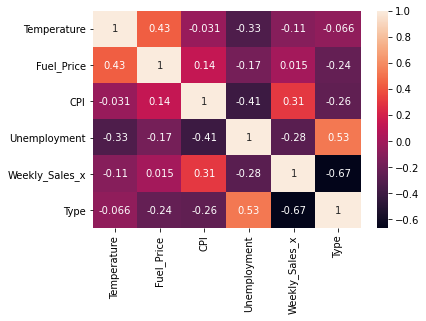

In [14]:
# Correlation matrix between Temperature,Fuel_Price,CPI,Unemployment and Weekly_Sales,Type
df_feature=df.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Weekly_Sales_x','Type'
                                                  ]].mean()
df_feature = df_feature.set_index('Date')
sns.heatmap(df_feature.corr(),annot=True)

<AxesSubplot:>

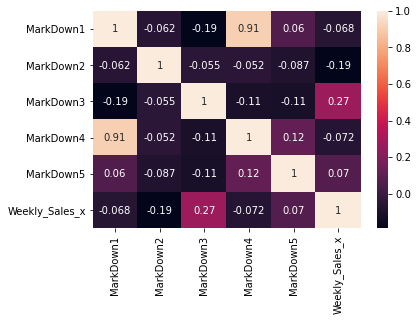

In [15]:
# Correlation matrix between MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 and Weekly_Sales
df_markdown = df.groupby(by=['Date'], as_index=False)[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Weekly_Sales_x'
                                                  ]].mean()
df_markdown = df_markdown.set_index('Date')
sns.heatmap(df_markdown.corr(),annot=True)

## 4. Machine Learning
- The machine learning model used for predicting department-wise weekly sales for each store is eXtreme Gradient Boosting (XGBoost). XGBoost dominates structured datasets on classification and regression predictive modeling problems. It is known for its fast execution speed and good model performance.

### 4.1 Creation of the model
- Evaluation:


Measure | Value
--- | ---
Mean absolute error | 4,361.6929
Mean squared error | 49,340,189.9605
Mean squared log error | 1.4269
Median absolute error | 2,611.7933
R squared | 0.9095

In [ ]:
%%bigquery
CREATE or REPLACE MODEL markdown.overall_models_xgboost
OPTIONS(MODEL_TYPE='BOOSTED_TREE_REGRESSOR',
        BOOSTER_TYPE = 'GBTREE',
        NUM_PARALLEL_TREE = 1,
        MAX_ITERATIONS = 30,
        TREE_METHOD = 'HIST',
        SUBSAMPLE = 0.85,
        INPUT_LABEL_COLS = ['Weekly_Sales']) AS

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  taxitrips AS (
  SELECT
    Weekly_Sales,
    EXTRACT(MONTH FROM Date) AS month,
    Temperature,
    Store,
    Fuel_Price,
    CPI,
    Unemployment,
    IsHoliday,
    Dept,
    Type,
    Size,
    CAST(MarkDown1 AS FLOAT64) Markdown1,
    CAST(MarkDown2 AS FLOAT64) Markdown2,
    CAST(MarkDown3 AS FLOAT64) Markdown3,
    CAST(MarkDown4 AS FLOAT64) Markdown4,
    CAST(MarkDown5 AS FLOAT64) Markdown5
   FROM
    `ba775-team-2b.Retail_Data_Analytics.Master`,params
  WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(Date AS STRING))),10) = params.TRAIN
  AND MarkDown1 != 'NA'
  AND MarkDown2 != 'NA'
  AND MarkDown3 != 'NA'
  AND MarkDown4 != 'NA'
  AND MarkDown5 != 'NA'
  )

  SELECT *
  FROM taxitrips


### 4.2 Evaluation of the model
- Evaluation:

Measure | Value
--- | ---
Mean absolute error | 7791.944899572095
Mean squared error | 1.6848493855453283E8
Mean squared log error | 1.4803936138513836
Median absolute error | 4228.513066406251
R squared | 0.7476791820345978
explained_variance | 0.7486277043073044

In [ ]:
%%bigquery --project ba775-team-2b
SELECT
  *
FROM
  ML.EVALUATE(MODEL markdown.overall_models_xgboost,
  (

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  taxitrips AS (
  SELECT
    Weekly_Sales,
    EXTRACT(MONTH FROM Date) AS month,
    Temperature,
    Store,
    Fuel_Price,
    CPI,
    Unemployment,
    IsHoliday,
    Dept,
    Type,
    Size,
    CAST(MarkDown1 AS FLOAT64) Markdown1,
    CAST(MarkDown2 AS FLOAT64) Markdown2,
    CAST(MarkDown3 AS FLOAT64) Markdown3,
    CAST(MarkDown4 AS FLOAT64) Markdown4,
    CAST(MarkDown5 AS FLOAT64) Markdown5
   FROM
    `ba775-team-2b.Retail_Data_Analytics.Master`,params
  WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(Date AS STRING))),10) = params.EVAL
  AND MarkDown1 != 'NA'
  AND MarkDown2 != 'NA'
  AND MarkDown3 != 'NA'
  AND MarkDown4 != 'NA'
  AND MarkDown5 != 'NA'
  )

  SELECT *
  FROM taxitrips
 ))

## 5. Summary
In conclusion, by investigating the relationship between all independent variables and the dependent variable--weekly sales, we know which variables are the main factors that affect the weekly sales. And we made a related regression model and used the xgboost model to predict the linear model. Through the above conclusions, we made the following recommendations about how to increase sales for stores.

The important factors (which majorly affect the average weekly sales)
- Size: There is a relative relationship between the size of the stores and the average weekly sales. That means that larger stores have relatively higher weekly sales on average. This relationship becomes stronger when the store is larger.
- Holiday: average weekly sales on holiday higher than the average weekly sales not on holiday
- CPI: Though lower CPI itself does not suggest higher sales, it is associated with higher sales in general.
- Unemployment rate: Though the unemployment rate between 5 and 10 itself does not suggest higher sales, it is associated with higher sales in general.
- Temperature: When the temperature dramatically decreases, the store sales will increase.



Recommendations for stores:
- Size: We recommend that stores that are in smaller sizes plan to scale their size to scale their sales. 
- Holiday: stores can take some actions to take advantage of the holiday such as hold some promotion events or adopt some new marketing strategies to sell products during holidays to obtain higher sales.
- CPI and unemployment rate: CPI and unemployment rate are economic factors. People are more willing to purchase when the economic situation is good. We think that stores need to control the cost during the time with higher CPI, and similarly to control profits that stores are willing to obtain to attract more customers during a tough time. For instance, to attract more consumers, stores can lower a little bit of the selling price since no one would always put itself at the point of equilibrium to sell the product. Also, stores need to investigate the reason that if the sales go up but with the higher CPI. It may due to the increase in price. 
- MarkDowns: MarkDowns must be adopted by stores as a means to attract customers and increase sales. According to the relationship between MarkDown1-5 and weekly sales in Figure 4, we can see that most of the points are concentrated in areas where the markdown is relatively low. This shows that according to the characteristics of these Markdowns, for the improvement of weekly sales, the effect of smaller MarkDowns is better than that of larger MarkDowns. Therefore, in the following sales, relatively small Markdowns will become the first choice to increase the weekly sale. What's more, MarkDown1 and Markdwon4 have a negative linear relationship with weekly sales. MarkDown3 and Markdwon5 have a positive linear relationship with weekly sales. The regression line for the Markdown2 is almost horizontal. Therefore, MarkDown3 and Markdwon5 can improve weekly sales more effectively. Markdowns can also reduce inventory pressure for stores. Markdown can be used to increase sales when certain product sales are in decline. For products that have been stocked for a long time and are about to expire, Markdowns can reduce losses.


## 6. All related charts

![](https://drive.google.com/uc?id=1Mh7gbRHcZO7ijtk45ZwVX3d87PvSOETh )


![](https://drive.google.com/uc?id=1LHu_tYvaQF3ZqXxiFed_OSj8UOnUSDfM)

![](https://drive.google.com/uc?id=1gh0PcdWtKKBwR1duHXiZkXEhY8F-Uvs7)


![](https://drive.google.com/uc?id=1TTId-zRI-adnibsg1rY_ubWnJedLvFCt)


![](https://drive.google.com/uc?id=1VUp4B5Ip4IpkWaELjMDmaeXBZM0Ldg35)

![](https://drive.google.com/uc?id=1_HMVOfnkeabtSlOPwAoXSEqyXeZdHAUJ)

![](https://drive.google.com/uc?id=1CIxIGxA9Id0Zs3TvGWHSUHEP0xRMTlSA)



![](https://drive.google.com/uc?id=1AH6S4Wjr6g4kIe04QkMdu304P6Tyg6rp)


![](https://drive.google.com/uc?id=1BQVwWmoxCwrt_Wqgd1vESHguvT_TunjC)



![](https://drive.google.com/uc?id=16rLOtAsj_wbkDy6zaDQLiZbQwbM4Vy75)


![](https://drive.google.com/uc?id=1NBqS3_vCyoDBzhWGe6ucaVtfrJ4pc6rj)

![](https://drive.google.com/uc?id=16o2kMzgpY0U6ubNqh58XfuzfHxgaRW2r)

![](https://drive.google.com/uc?id=1zr9BTO38V3hoImt37Jj6M-Qyi8Aayk50)
